In [20]:
import pandas as pd

In [22]:
df = pd.read_csv("Titanic.csv")

In [24]:
# Вычислить процент потерянных данных после выполнения пп 1.1 – 1.2
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.round(2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1) 

In [30]:
df = df[~df['Age'].isnull()]
df = df[~df['Embarked'].isnull()]

In [32]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q':2, 'S':3})

In [34]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
374,375,0,3,1,3.0,3,1,21.0750,3
12,13,0,3,0,20.0,0,0,8.0500,3
83,84,0,1,0,28.0,0,0,47.1000,3
72,73,0,2,0,21.0,0,0,73.5000,3
780,781,1,3,1,13.0,0,0,7.2292,1
705,706,0,2,0,39.0,0,0,26.0000,3
756,757,0,3,0,28.0,0,0,7.7958,3
192,193,1,3,1,19.0,1,0,7.8542,3
74,75,1,3,0,32.0,0,0,56.4958,3
597,598,0,3,0,49.0,0,0,0.0000,3


Задание 1. Выполнить предобработку данных с помощью Pandas
1.1. Удалить все строки данных содержащие пропуски.
1.2. Удалить столбцы содержащие не числовые значения, за исключением столбцов Sex и Embarked
1.3. Перекодировать данные в числовой вид в столбцах Sex и Embarked. Sex – 0 и 1, Embarked – 1,2,3
1.4. Удалить столбец PassengerId как не несущий полезной информации.
1.5. Вычислить процент потерянных данных после выполнения пп 1.1 – 1.2
Задание 2. Машинное обучение
2.1. Разбить полученные данные на обучающую и тестовые выборки
2.2. Решить задачу классификации методом логистической регрессии
2.3. Вывести точность полученной модели
2.4. Оценить влияние признака Embarked на точность модели

In [37]:
df = df.drop(['PassengerId'], axis=1) 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_pred = model.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.7972027972027972


In [49]:
# Оценка влияния признака Embarked на точность модели
model_without_embarked = LogisticRegression()
model_without_embarked.fit(X_train.drop('Embarked', axis=1), y_train)
y_pred_without_embarked = model_without_embarked.predict(X_test.drop('Embarked', axis=1))
accuracy_without_embarked = accuracy_score(y_test, y_pred_without_embarked)
print(f'Точность модели без признака Embarked: {accuracy_without_embarked}')

Точность модели без признака Embarked: 0.7972027972027972


## Метрики

In [52]:
from sklearn.metrics import *

In [64]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision: 0.2f}\nRecall: {recall : 0.2f}\nF1: {f1 : 0.2f}')

Precision:  0.85
Recall:  0.65
F1:  0.74


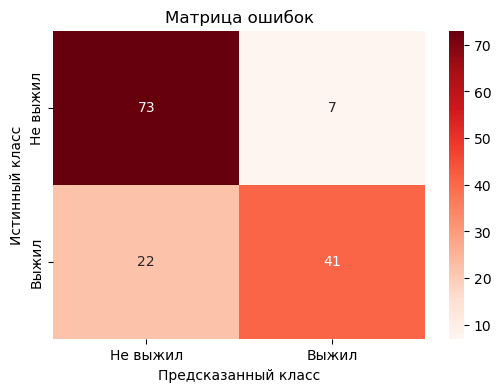

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Не выжил', 'Выжил'],
            yticklabels=['Не выжил', 'Выжил'])
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

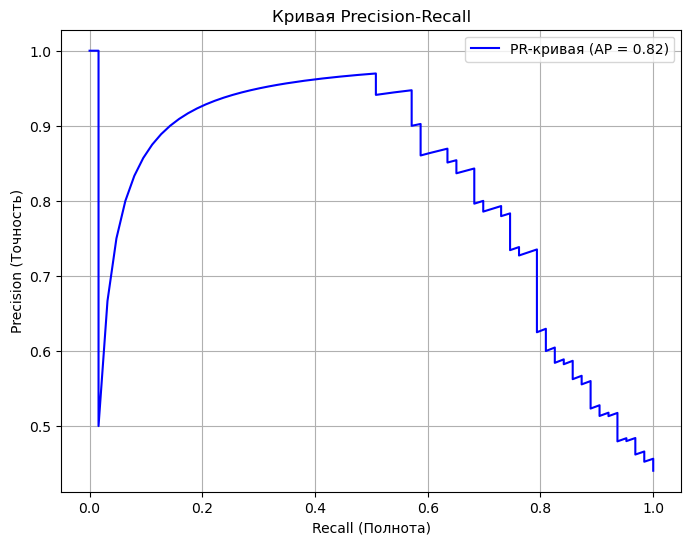

In [121]:
y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR-кривая (AP = {average_precision:.2f})', color='blue')
plt.xlabel('Recall (Полнота)')
plt.ylabel('Precision (Точность)')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid()

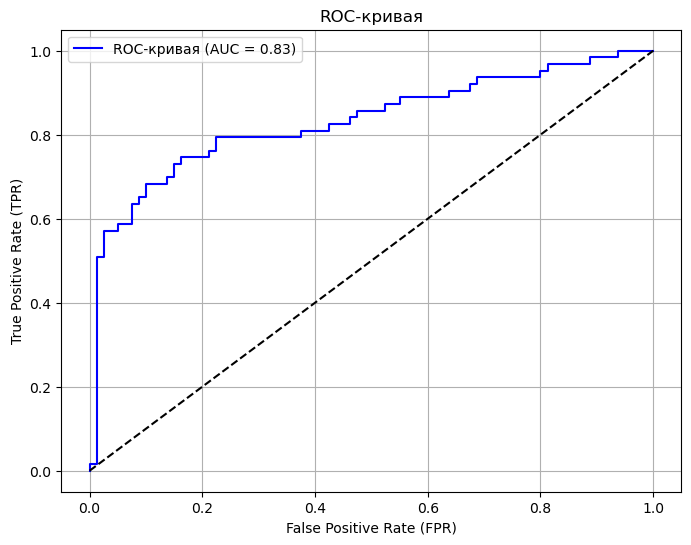

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend()
plt.grid()
plt.show()

Модель показывает хорошее качество: точность составляет ~80%, ROC AUC — 0.83, а PR AUC — 0.82. Высокое значение precision (0.85) указывает на то, что модель почти не делает ложных положительных предсказаний. Однако recall равен 0.65, что говорит о том, что часть выживших пассажиров не была распознана моделью. 